## DCT via FFT

Reference: https://dsp.stackexchange.com/questions/2807/fast-cosine-transform-via-fft/10606

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
%matplotlib inline

N = 40
y = np.arange(80,80+40)
y

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])

In [2]:
# DCT
dcted = dct(y).astype(int)
dcted

array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
         -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
          0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [4]:
# DCT via FFT
yy = np.zeros(2*N)
yy[:N] = y
yy[N:] = y[::-1]
k = np.arange(N)
Y = fft(yy)[:N]

In [5]:
Y = Y * (np.cos(-1*np.pi*k/(2*N)) + 1j * np.sin(-1*np.pi*k/(2*N)))
Y = Y.real
DCTED = Y.astype(int)
y, yy, DCTED, DCTED == dcted

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119., 119., 118., 117., 116.,
        115., 114., 113., 112., 111., 110., 109., 108., 107., 106., 105.,
        104., 103., 102., 101., 100.,  99.,  98.,  97.,  96.,  95.,  94.,
         93.,  92.,  91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,
         82.,  81.,  80.]),
 array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
          -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
           0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0

## Mel scale

In [6]:
f = np.linspace(0, 22000, N)

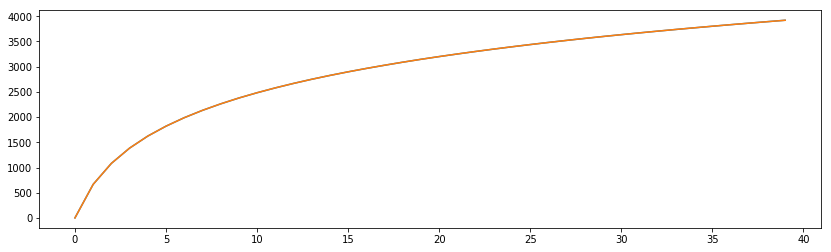

In [7]:
logten2 = np.log10(2)
import math

c = [1.23149591368684, -4.11852516267426, 6.02197014179219, -3.13396450166353]
def log10_approx(x):
    f, e = math.frexp(x)
    return logten2 * (c[0]*f**3 + c[1]*f**2 + c[2]*f + c[3] + e)

log10_approx_ = np.vectorize(log10_approx)

plt.figure(figsize=[14,4])
plt.plot(2595 * log10_approx_(1 + f/700))
plt.plot(2595 * np.log10(1 + f/700))